In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import filters
from skimage import exposure
from skimage.exposure import histogram

Text(0.5, 1.0, 'histogram of gray values')

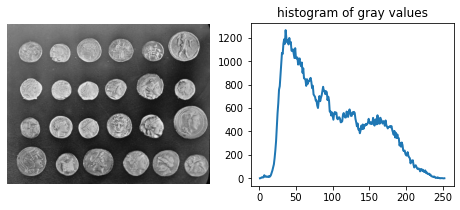

In [2]:
#plot histogram data coins dr lib skimage.data
coins =  data.coins()
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8,3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

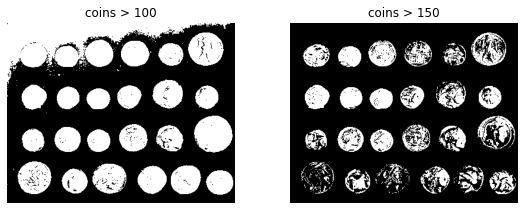

In [3]:
#thresholding
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')
    
plt.tight_layout()

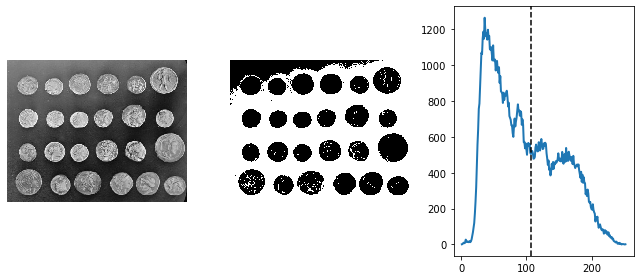

In [4]:
#otsu threshold
from skimage import data
from skimage import filters
from skimage import exposure
import matplotlib.pyplot as plt

coins = data.coins()
val = filters.threshold_otsu(coins)

hist, bins_center = exposure.histogram(coins)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(coins, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(coins < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

(-0.5, 383.5, 302.5, -0.5)

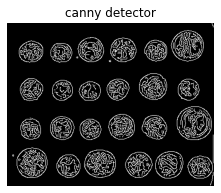

In [5]:
#canny edge
from skimage.feature import canny

edges = canny(coins/255.)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('canny detector')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

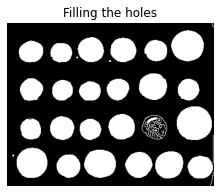

In [6]:
#filling the holes
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('Filling the holes')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

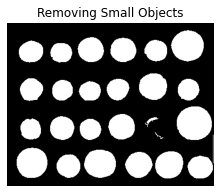

In [7]:
#removing small object
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('Removing Small Objects')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

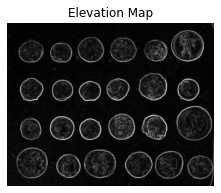

In [8]:
#Region Based Segmentation
#elevation map
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('Elevation Map')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

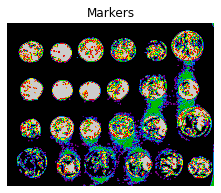

In [9]:
#markers
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('Markers')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

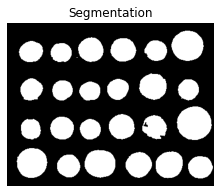

In [10]:
#Watershed Transform
from skimage.segmentation import watershed

segmentation = watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray)
ax.set_title('Segmentation')
ax.axis('off')

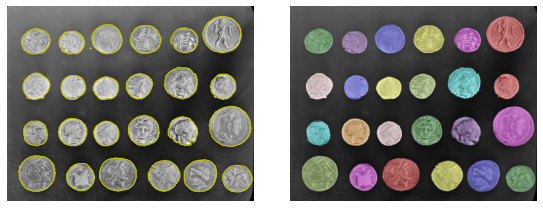

In [11]:
#hasil koin tersegmentasi&terlabel
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image = coins, bg_label = 0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')
    
plt.tight_layout()

plt.show()

(-0.5, 251.5, 311.5, -0.5)

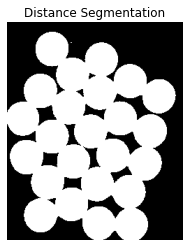

In [12]:
#image segmentation using opencv
#otsu binarization
import cv2 as cv
import cv2

img = cv2.imread("./coins.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap=plt.cm.gray)
plt.title('Distance Segmentation')
plt.axis('off')

In [3]:
#noise removal dan thresholding
import cv2 as cv
import cv2

img = cv2.imread('coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

#sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

#Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)

#Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

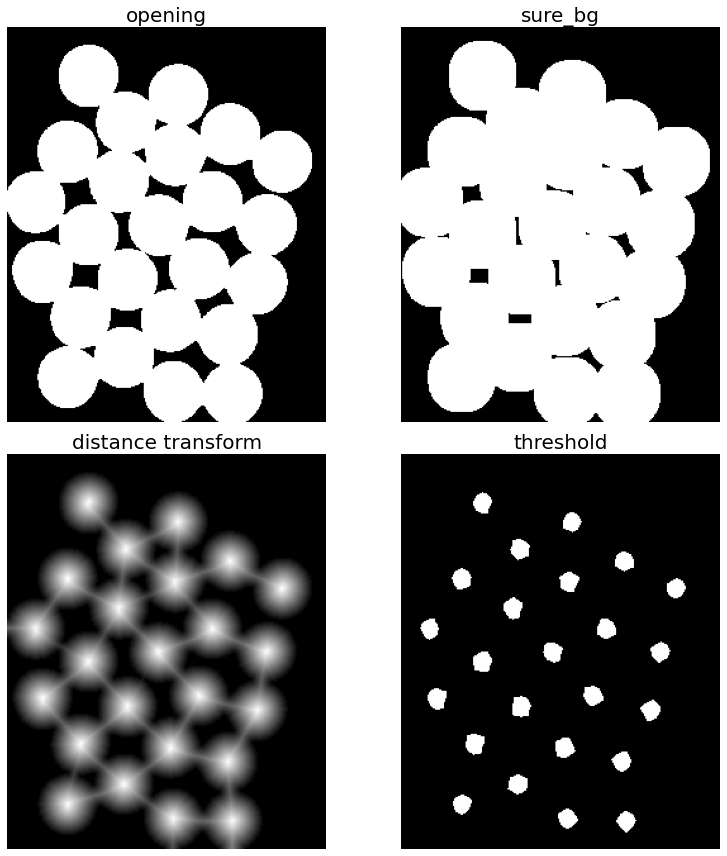

In [18]:
#plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharex=True, sharey = True)

ax = axes.ravel()

ax[0].imshow(opening, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('opening',fontsize=20)

ax[1].imshow(sure_bg, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('sure_bg',fontsize=20)

ax[2].imshow(dist_transform, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('distance transform',fontsize=20)

ax[3].imshow(sure_fg, cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title('threshold',fontsize=20)

fig.tight_layout()
plt.show()

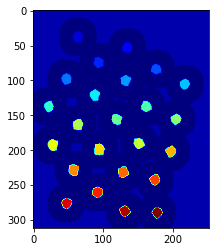

In [19]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers,cmap=plt.cm.jet)

Text(0.5, 1.0, 'markers')

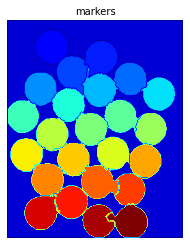

In [20]:
#watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers,cmap=plt.cm.jet)
plt.axis('off')
plt.title('markers', fontsize=10)